In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential

import plotly.graph_objs as go
from keras.layers import Dense,LSTM,Dropout
 

In [3]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


Text(0, 0.5, 'Price')

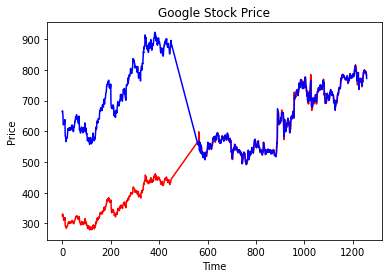

In [36]:
##plotting the data where we can see the trend of the stock price open to close 
## plot the data of date where it is open to close
plt.plot(data.Open,color='red',label='Open')
plt.plot(data.Close,color='blue',label='Close')
plt.title('Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')


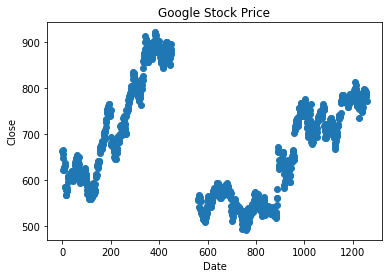

In [31]:
plt.scatter(data.index,data.Close)
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Stock Price')
plt.show()  

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [8]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [10]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 9s - loss: 0.0280 - 9s/epoch - 256ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0137 - 4s/epoch - 117ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0081 - 4s/epoch - 118ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0077 - 4s/epoch - 119ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0071 - 4s/epoch - 116ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0080 - 4s/epoch - 117ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0076 - 4s/epoch - 128ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0064 - 4s/epoch - 127ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0070 - 4s/epoch - 107ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0081 - 4s/epoch - 120ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0066 - 4s/epoch - 120ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0054 - 4s/epoch - 112ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0051 - 4s/epoch - 122ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0054 - 4s/epoch - 119ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0055 - 4s/epoch - 116ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0057 - 4s/epoch - 111ms/step
Epoch 17/20
35/35

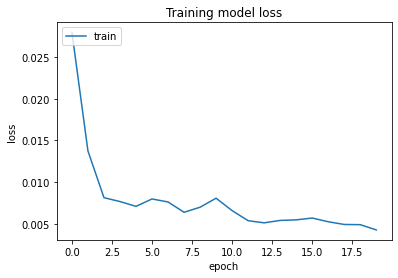

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([[1.2461332],
       [1.2482307],
       [1.2603545],
       [1.2784885],
       [1.291962 ],
       [1.2894864],
       [1.2730621],
       [1.2528358],
       [1.2416657],
       [1.2406973],
       [1.2350235],
       [1.2237668],
       [1.2138095],
       [1.2046863],
       [1.20371  ],
       [1.2095833],
       [1.2300202],
       [1.2607697],
       [1.2944249],
       [1.3265562],
       [1.3363197],
       [1.3288823],
       [1.3042082],
       [1.2722878],
       [1.2460715],
       [1.2338778],
       [1.2341756],
       [1.2364535],
       [1.2294555],
       [1.2175883],
       [1.2044897],
       [1.1898113],
       [1.1678183],
       [1.1411268],
       [1.1322169],
       [1.1451595],
       [1.1702718],
       [1.1965376],
       [1.2196985],
       [1.2289888],
       [1.2392998],
       [1.2536108],
       [1.2712814],
       [1.2878263],
       [1.2985836],
       [1.2989069],
       [1.2874031],
       [1.2783717],
       [1.2775782],
       [1.2860731],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

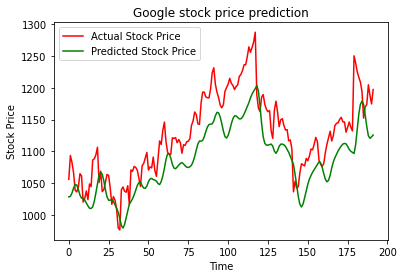

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [2]:
def estimate_coef(x, y):
    def estimate_coef(x, y):
        #number of observation/points
        n = np.size(x)
        # mean of x and y vector
        m_x = np.mean(x)
        m_y = np.mean(y)
def plot_regression_line(x,y,b):
    #plotting the actual points as scatter plot
    plt.scatter(x,y, color = "m", marker = "0", s = 30)
    #predict response vector
    y_pred = b[0] + b[1]*x
    #plotting the regression line
    plt.plot(x,y_pred, color = "g")
    #putting labels
    plt.xlabel('x')
    plt.ylabel('y')
    # function to show plot
    plt.show()    